Project 4

In [37]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
from datetime import datetime as dt
import matplotlib
import geocoder
from geopy.geocoders import Nominatim as nm
import time
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as cx
from shapely.geometry import Point
import pyproj
import seaborn as sns
import plotly.express as px

In [7]:
df = pd.read_csv('../Data/zillow_data.csv')
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [9]:
df.columns[:100]

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08',
       '1996-09', '1996-10', '1996-11', '1996-12', '1997-01', '1997-02',
       '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08',
       '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02',
       '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08',
       '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02',
       '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08',
       '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02',
       '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08',
       '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02',
       '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08',
       '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02',
       '2002-03', '2002-04', '2002-05', '2002-06',

In [10]:
df['Geolocate'] = df['City'] + ', ' + df['State']


In [11]:
df[df.Geolocate == 'Washington, DC']

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Geolocate
29,66126,20002,Washington,DC,Washington,District of Columbia,30,94300.0,94000.0,93700.0,...,668000,672200,673100,674600,678200,680900,683000,687500,691300,"Washington, DC"
33,66133,20009,Washington,DC,Washington,District of Columbia,34,178800.0,179200.0,179600.0,...,1027500,1034300,1040500,1047400,1055400,1065900,1076400,1081000,1078200,"Washington, DC"
181,66135,20011,Washington,DC,Washington,District of Columbia,182,118900.0,118500.0,118200.0,...,586200,591200,593200,591200,589500,590800,599100,611400,619100,"Washington, DC"
246,66142,20019,Washington,DC,Washington,District of Columbia,247,91300.0,91000.0,90600.0,...,296300,302500,306700,308800,310800,313400,314100,311800,308600,"Washington, DC"
258,66125,20001,Washington,DC,Washington,District of Columbia,259,92000.0,92600.0,93200.0,...,768800,771200,773300,777600,780500,781600,785500,791400,793300,"Washington, DC"
402,66143,20020,Washington,DC,Washington,District of Columbia,403,104500.0,103800.0,103000.0,...,317600,321800,324500,324800,324900,324900,327300,332800,337000,"Washington, DC"
1263,66132,20008,Washington,DC,Washington,District of Columbia,1264,450100.0,448200.0,446300.0,...,1508800,1509700,1506000,1509100,1514300,1519400,1527900,1539600,1545900,"Washington, DC"
1448,66127,20003,Washington,DC,Washington,District of Columbia,1449,130000.0,130100.0,130200.0,...,807200,811900,813400,814600,814600,815300,817300,820200,820200,"Washington, DC"
1707,66151,20032,Washington,DC,Washington,District of Columbia,1708,85700.0,85500.0,85400.0,...,293400,297800,301500,303700,304000,304600,306800,308200,307400,"Washington, DC"
2066,66139,20016,Washington,DC,Washington,District of Columbia,2067,362000.0,361200.0,360300.0,...,1198700,1196400,1190400,1184800,1183600,1186600,1190000,1196000,1199500,"Washington, DC"


In [12]:
city_list = ['Washington, DC','New York, NY','San Francisco, CA','Seattle, WA',\
             'Dallas, TX','Los Angeles, CA','San Jose, CA','Chicago, IL','Baltimore, MD','Boston, MA']

In [13]:
df.Geolocate.isin(city_list)

0         True
1        False
2        False
3         True
4        False
         ...  
14718    False
14719    False
14720    False
14721    False
14722    False
Name: Geolocate, Length: 14723, dtype: bool

In [14]:
df_cities = df[df.Geolocate.isin(city_list)]
df_cities

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Geolocate
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,"Chicago, IL"
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,"Chicago, IL"
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,400000,407300,411600,413200,414300,413900,411400,413200,417900,"New York, NY"
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,787100,776100,774900,777900,777900,778500,780500,782800,782800,"Chicago, IL"
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500,"San Francisco, CA"
10,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,851000,853900,870000,885100,887800,890500,901700,930700,963200,"New York, NY"
12,62087,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,...,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600,"New York, NY"
13,62045,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,...,777300,788800,793900,796000,799700,806600,810600,813400,816200,"New York, NY"
16,84646,60647,Chicago,IL,Chicago,Cook,17,122700.0,122800.0,122800.0,...,461400,464300,466500,467900,470600,474500,475100,472600,470200,"Chicago, IL"
19,84620,60618,Chicago,IL,Chicago,Cook,20,142600.0,143100.0,143400.0,...,461200,459900,459200,458700,457900,457400,459000,462500,464300,"Chicago, IL"


In [15]:
df_income = pd.read_csv('../Data/kaggle_income.csv',
                       encoding = 'ISO-8859-1')
df_income['Geolocate'] = df_income['City'] + ', ' + df_income['State_ab']
df_income = df_income[df_income.Geolocate.isin(city_list)]
df_income

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w,Geolocate
1735,6013318,6,California,CA,Los Angeles County,Los Angeles,Westmont,CDP,place,90047,323,4785352,0,33.941679,-118.301838,39928,26090,41109,7649.302158,"Los Angeles, CA"
2012,60212459,6,California,CA,Alameda County,Los Angeles,Alameda city,Track,Track,90041,323,4107036,30513,34.145267,-118.204386,88527,59408,72801,206.020316,"Los Angeles, CA"
2013,60212469,6,California,CA,Alameda County,Los Angeles,Alameda city,Track,Track,90041,323,1094425,0,34.134781,-118.192851,106443,86878,81571,170.322969,"Los Angeles, CA"
2014,60212479,6,California,CA,Alameda County,Los Angeles,Alameda city,Track,Track,90042,323,535234,0,34.119972,-118.189286,56625,49009,36976,270.156337,"Los Angeles, CA"
2015,60212489,6,California,CA,Alameda County,Los Angeles,Alameda city,Track,Track,90042,323,485332,0,34.121666,-118.209226,65014,46199,60243,273.520535,"Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30867,5302409,53,Washington,WA,Adams County,Seattle,Hatton,Track,Track,98118,206,2783287,1396979,47.555977,-122.265750,99369,85368,65621,780.283702,"Seattle, WA"
30878,5302419,53,Washington,WA,Adams County,Seattle,Hatton,Track,Track,98108,206,1070775,0,47.538359,-122.286204,47899,28094,51251,1143.971756,"Seattle, WA"
30889,5302429,53,Washington,WA,Adams County,Seattle,Hatton,Track,Track,98118,206,3506716,0,47.520170,-122.282850,69658,60039,54538,930.085090,"Seattle, WA"
31011,5302539,53,Washington,WA,Adams County,Seattle,Hatton,Track,Track,98126,206,1160397,0,47.512846,-122.363268,74622,65411,47653,430.775298,"Seattle, WA"


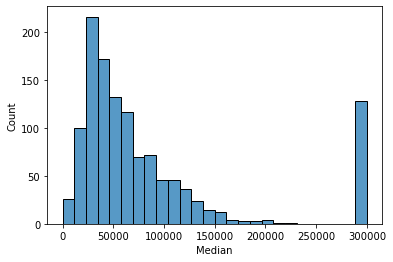

In [16]:
sns.histplot(df_income['Median']);

In [17]:
#There seemed to be a lot of erroneous median income values
# equal to exactly $300,000 for many cities, so I removed those
df_income = df_income[df_income['Median'] != 300000]
df_income

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w,Geolocate
1735,6013318,6,California,CA,Los Angeles County,Los Angeles,Westmont,CDP,place,90047,323,4785352,0,33.941679,-118.301838,39928,26090,41109,7649.302158,"Los Angeles, CA"
2012,60212459,6,California,CA,Alameda County,Los Angeles,Alameda city,Track,Track,90041,323,4107036,30513,34.145267,-118.204386,88527,59408,72801,206.020316,"Los Angeles, CA"
2013,60212469,6,California,CA,Alameda County,Los Angeles,Alameda city,Track,Track,90041,323,1094425,0,34.134781,-118.192851,106443,86878,81571,170.322969,"Los Angeles, CA"
2014,60212479,6,California,CA,Alameda County,Los Angeles,Alameda city,Track,Track,90042,323,535234,0,34.119972,-118.189286,56625,49009,36976,270.156337,"Los Angeles, CA"
2015,60212489,6,California,CA,Alameda County,Los Angeles,Alameda city,Track,Track,90042,323,485332,0,34.121666,-118.209226,65014,46199,60243,273.520535,"Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30867,5302409,53,Washington,WA,Adams County,Seattle,Hatton,Track,Track,98118,206,2783287,1396979,47.555977,-122.265750,99369,85368,65621,780.283702,"Seattle, WA"
30878,5302419,53,Washington,WA,Adams County,Seattle,Hatton,Track,Track,98108,206,1070775,0,47.538359,-122.286204,47899,28094,51251,1143.971756,"Seattle, WA"
30889,5302429,53,Washington,WA,Adams County,Seattle,Hatton,Track,Track,98118,206,3506716,0,47.520170,-122.282850,69658,60039,54538,930.085090,"Seattle, WA"
31011,5302539,53,Washington,WA,Adams County,Seattle,Hatton,Track,Track,98126,206,1160397,0,47.512846,-122.363268,74622,65411,47653,430.775298,"Seattle, WA"


In [18]:
df_income = df_income.groupby(['Geolocate']).agg({'Mean': 'mean',
                                                  'Median': 'mean',
                                                  'Stdev': 'mean'}).reset_index()
df_income[['Mean', 'Median', 'Stdev']] = df_income[['Mean', 'Median', 'Stdev']].astype('int')
df_income = df_income.rename(columns = {'Mean':'Mean_income','Median':'Median_income','Stdev':'Stdev_income'})
df_income

,Geolocate,Mean_income,Median_income,Stdev_income
0,"Baltimore, MD",61988,52809,45595
1,"Boston, MA",79133,59771,67582
2,"Chicago, IL",62931,50270,49391
3,"Dallas, TX",64670,55128,46893
4,"Los Angeles, CA",57342,45533,46291
5,"New York, NY",84977,73823,61328
6,"San Francisco, CA",98358,83966,72248
7,"San Jose, CA",93131,83024,61203
8,"Seattle, WA",79901,66187,57554
9,"Washington, DC",85698,73142,62392


In [19]:
city_deets = {'Washington, DC':[38.9071923,-77.0368707,672228],'New York, NY':[40.730610,-73.935242,8550405],'San Francisco, CA':[37.773972,-122.431297,864816],'Seattle, WA':[47.608013,-122.335167,684451],\
             'Dallas, TX':[32.7766642,-96.7969879, 1300092],'Los Angeles, CA':[34.0522342, -118.2436849,3971883],'San Jose, CA':[37.33548,-121.893028,1026908],'Chicago, IL':[41.8781136,-87.6297982,2720546],\
              'Baltimore, MD':[39.299236,-76.609383,621849],'Boston, MA':[42.3600825,-71.0588801,667137]}

city_deets = pd.DataFrame.from_dict(city_deets,orient='index',columns=['latitude','longitude','2015_population'])
city_deets = city_deets.reset_index()
city_deets

,index,latitude,longitude,2015_population
0,"Washington, DC",38.907192,-77.036871,672228
1,"New York, NY",40.730610,-73.935242,8550405
2,"San Francisco, CA",37.773972,-122.431297,864816
3,"Seattle, WA",47.608013,-122.335167,684451
4,"Dallas, TX",32.776664,-96.796988,1300092
5,"Los Angeles, CA",34.052234,-118.243685,3971883
6,"San Jose, CA",37.335480,-121.893028,1026908
7,"Chicago, IL",41.878114,-87.629798,2720546
8,"Baltimore, MD",39.299236,-76.609383,621849
9,"Boston, MA",42.360082,-71.058880,667137


In [20]:
city_info = df_income.merge(city_deets, left_on = 'Geolocate',right_on='index')
city_info.drop('index', axis=1,inplace=True)

In [21]:
home_price_2018 = df_cities.groupby('Geolocate').median()
home_price_2018 = home_price_2018[['2018-01']]
home_price_2018 = home_price_2018.reset_index()
home_price_2018

,Geolocate,2018-01
0,"Baltimore, MD",163650.0
1,"Boston, MA",559050.0
2,"Chicago, IL",353900.0
3,"Dallas, TX",328000.0
4,"Los Angeles, CA",735600.0
5,"New York, NY",735300.0
6,"San Francisco, CA",1719100.0
7,"San Jose, CA",1096900.0
8,"Seattle, WA",840200.0
9,"Washington, DC",772550.0


In [22]:
city_info = city_info.merge(home_price_2018)
city_info = city_info.rename(columns = {'2018-01':'Median_house_price_2018'})
city_info

,Geolocate,Mean_income,Median_income,Stdev_income,latitude,longitude,2015_population,Median_house_price_2018
0,"Baltimore, MD",61988,52809,45595,39.299236,-76.609383,621849,163650.0
1,"Boston, MA",79133,59771,67582,42.360082,-71.058880,667137,559050.0
2,"Chicago, IL",62931,50270,49391,41.878114,-87.629798,2720546,353900.0
3,"Dallas, TX",64670,55128,46893,32.776664,-96.796988,1300092,328000.0
4,"Los Angeles, CA",57342,45533,46291,34.052234,-118.243685,3971883,735600.0
5,"New York, NY",84977,73823,61328,40.730610,-73.935242,8550405,735300.0
6,"San Francisco, CA",98358,83966,72248,37.773972,-122.431297,864816,1719100.0
7,"San Jose, CA",93131,83024,61203,37.335480,-121.893028,1026908,1096900.0
8,"Seattle, WA",79901,66187,57554,47.608013,-122.335167,684451,840200.0
9,"Washington, DC",85698,73142,62392,38.907192,-77.036871,672228,772550.0


In [ ]:
fig = px.scatter_geo(city_info, lat = 'latitude', lon = 'longitude', size = '2015_population',
                         size_max = 25, color = 'Median_house_price_2018',
                         color_continuous_scale = 'jet', hover_name = 'Geolocate',
                         hover_data = {'latitude': False,
                                       'longitude': False,
                                       '2015_population': ':,2f',
                                       'Median_income': ':$,2f',
                                       'Median_house_price_2018': ':$,2f'})
    
    fig.update_layout(title_text = 'Median Home Price (Dec 2020), Income (2017) and City Populations (2019) for the United States',
                      title_font_size = 24,
                      title_xref = 'container',
                      title_y = 0.99,
                      title_x = 0.5,
                      showlegend = True,
                      geo = dict(scope = 'usa', landcolor = 'rgba(225, 225, 225, 0.75)'),
                      width = 1200, height = 700, legend_title_text = 'City size, ranked by population')